# Python for Data Science

## Numpy practice

In [1]:
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
x = np.random.rand(10)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


# 1. Introductory numpy exercises

Use vectorization (like A+A which is the item-by-item addition) instead of for cycles. You need to implement a function in each excersise which has a NumPy array as its input.

## 1.1 Standardization for 2D arrays.

\begin{equation*}
X_{std} = \frac{X - \mu}{\sigma},
\end{equation*}

Where $\mu$ is the mean and $\sigma$ is the standard deviation.

In [4]:
def standardization(x):
    return (x-x.mean())/x.std()

In [5]:
standardization(x)

array([-0.36293708,  0.53895184, -0.07048605, -0.38424253, -1.04139636,
        0.16331669, -0.96587166,  1.49617496,  1.88587438, -1.25938418])

Manual check using for loop:

In [6]:
np.any(standardization(x) == np.array([(i-np.mean(x))/np.std(x) for i in x]))

True

## 1.2 Normalization of 2D arrays.

\begin{equation*}
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
\end{equation*}

In [7]:
def normalization(x):
    return (x-x.min())/(x.max()-x.min())

In [8]:
normalization(x)

array([0.28501539, 0.57176095, 0.37799695, 0.27824156, 0.06930681,
       0.45233193, 0.09331905, 0.8760994 , 1.        , 0.        ])

Manual check using for loop:

In [9]:
np.any(normalization(x) == np.array([(i-min(x))/(max(x)-min(x)) for i in x]))

True

## 1.3 Create the softmax function.
$$
x_i \mapsto \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)}
$$

In [10]:
def softmax(x):
    return np.exp(x)/np.exp(x).sum()

In [11]:
softmax(x)

array([0.09189149, 0.1085254 , 0.09698519, 0.09153103, 0.08108108,
       0.10125975, 0.08221865, 0.12948537, 0.1391368 , 0.07788524])

Manual check using for loop:

In [12]:
np.any(softmax(x) == np.array([np.exp(i) for i in x])/sum(np.array([np.exp(i) for i in x])))

True

# 2. Vectorization

Transform the examples below into vectorized form (without for cycles and lists).

## 2.1 Euclidean norm line by line

Create a function which computes the Euclidean norm of each line for a 2D array. Use `numpy` operations and vectorization, avoid `for` cycles. Here is the *wrong* solution.

In [13]:
def rowwise_norm(X):
    def my_dot(x, y):
        result = 0.0
        for i in range(len(x)):
            result += x[i] * y[i]
        return result
    return np.array([np.sqrt(my_dot(x, x)) for x in X])

X = np.arange(5)[:, None]*np.ones((5, 3));
print(X)
print(rowwise_norm(X))
print(rowwise_norm([[1], [-1], [1], [-1]]))

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[0.         1.73205081 3.46410162 5.19615242 6.92820323]
[1. 1. 1. 1.]


In [14]:
def rowwise_euclidean_norm(X):
    return np.linalg.norm(X, axis=1)

In [15]:
rowwise_euclidean_norm(X)

array([0.        , 1.73205081, 3.46410162, 5.19615242, 6.92820323])

Manual check with the "wrong" solution:

In [16]:
np.any(rowwise_euclidean_norm(X) == rowwise_norm(X))

True

## 2.2 Chessboard

Create a function which produces an $n\times n$ array which contains $\pm1$ numbers like a chessboard. $\left(M_{i,j} = (-1)^{i+j}\right)$

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
n = 10

A not vectorised solution:

In [18]:
def chessboard(n):
    chess = []
    for i in range(n):
        for j in range(n):
            chess.append((-1)**(i+j))
    chess = np.array(chess).reshape(n,n) 
    sns.heatmap(chess)
    plt.plot()
    return chess

array([[ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1]])

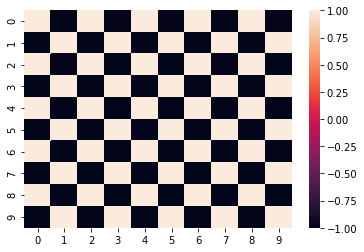

In [19]:
chessboard(n)

A vectorised solution:

In [20]:
def chessboard(n):
    x = np.ones((n,n))
    x[1::2,::2] = -1
    x[::2,1::2] = -1
    sns.heatmap(x)
    plt.plot()
    return x

array([[ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.]])

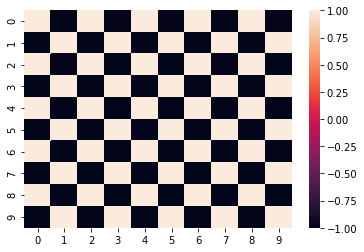

In [21]:
chessboard(n)

# 3. Broadcast quiz

Will the operations below work, and if so, what will be the shape of the result?
* Try to think of the result first without running the cells below.

In [22]:
np.ones(3) + np.ones((3,3)) # yes

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [23]:
np.ones(3) + np.ones((4, 3)) # yes

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [24]:
np.ones(3) + np.ones((3, 4)) # no

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

In [25]:
np.ones(3)[:, None] + np.ones((3, 4)) # yes

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [26]:
np.ones((1, 2, 3)) + np.ones((1, 3))[:, None, :] # yes

array([[[2., 2., 2.],
        [2., 2., 2.]]])

In [27]:
np.ones((1, 2, 3)) + np.ones((1, 3)) # yes

array([[[2., 2., 2.],
        [2., 2., 2.]]])

# 4. Advanced NumPy exercises

## 4.1 Block-matrix

Create a function called __`blockmatrix`__ , which will generate the following square matrix:

$$
\left(\begin{array}{ccc|ccc}
 1 & & 0& 0 & \cdots & 0 \\
 & \ddots & & \vdots & & \vdots \\
  0& & 1 & 0 & \cdots & 0 \\\hline
  0 & \cdots & 0 & 1 & \cdots & 1 \\
  \vdots & & \vdots & \vdots & & \vdots \\
  0 & \cdots & 0 & 1 & \cdots & 1
\end{array}\right)
$$

The upper left block is an identity matrix, the lower right block is a square matrix consisting of all $1$s, the rest two blocks are all $0$ matrices. The function should expect two positive integers as an input, the first needs to specify the size of the upper right identity matrix, and the second should specify the lower right $1$ matrix's size.
You can use the NumPy generators `ones`, `zeros`, `eye` and concatenation only.

In [28]:
def blockmatrix(n, m):
    return np.vstack([np.hstack([np.eye(n), np.zeros((n, m))]),
                      np.hstack([np.zeros((m, n)), np.ones((m, m))])])

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]]


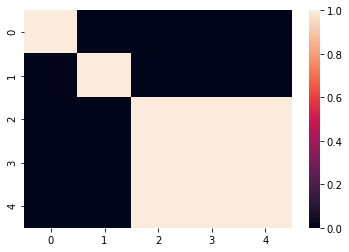

In [29]:
n, m = (2, 3)
block = blockmatrix(n, m)
print(block)
sns.heatmap(block)
plt.show()

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]]


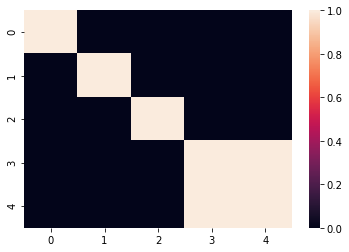

In [30]:
n, m = (3, 2)
block = blockmatrix(n, m)
print(block)
sns.heatmap(block)
plt.show()

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]


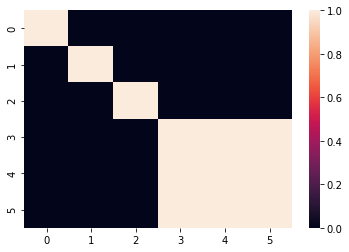

In [31]:
n, m = (3, 3)
block = blockmatrix(n, m)
print(block)
sns.heatmap(block)
plt.show()

## 4.2 Block-matrix from any square matrices

Create a function which expects any number of square matrices and outputs a block-matrix which contains the input matrices in its main diagonal, and contains 0 in every other place.

In [32]:
def blockmatrix_from_any_square_matricies(list_of_matrices):
    # cumulative shape
    shape = [M.shape[0] for M in list_of_matrices]
    shape.insert(0, 0)
    shape = np.array(shape).cumsum()
    
    # zero matrix with full shape
    blockmatrix = np.zeros((max(shape), max(shape)))
    
    # populate slices
    for i, M in enumerate(list_of_matrices):
        n_prev = shape[i]
        n = shape[i+1]
        blockmatrix[n_prev:n,n_prev:n] = M
    return blockmatrix

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5.]]


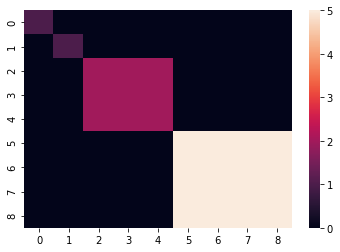

In [33]:
list_of_matrices = [np.eye(2), np.ones((3,3))*2, np.ones((4,4))*5]
block = blockmatrix_from_any_square_matricies(list_of_matrices)
print(block)
sns.heatmap(block)
plt.show()

## 4.3 Numeric derivative

Create a __`derivate`__ function estimates the derivate of an $\mathbb{R}\mapsto\mathbb{R}$ function numerically using the finite difference method. Implement the function using NumPy, without for cycles!

The input is a one-dimensional `f np.array` containing the function's values and an optional one-dimensional `x np.array` containing the x values. If the user does not define `x` , it should have a default value of `x =  [0, 1, ..., n]`.  

Output is a one-dimensional `f np.array` of which length is one less than the input array's lenght.

In [34]:
def derivate(f, x=np.arange(0)):
    pass